# Assignment 3

The dataset is related to the red variant of "Vinho Verde" wine. It contains 1599 data points where features are the physicochemical properties and the target value is quality which is an integer score ranging from 0-10. Your task is to classify if the wine provided is good based on its physicochemical properties.


## Importing Modules and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Dataset: Red Wine Quality

In [2]:
df = pd.read_csv("winequality-red.csv")

(i) Create a new column on the dataset with binary values (i.e, 0 or 1) telling whether the wine is of good quality or not. You can categorise wines with quality>=7 to be of good quality. Drop the original ‘quality’ column.


(ii) Perform the necessary data pre-processing steps (i,e, cleaning data,  creating a correlation matrix, dealing with outliers, normalising data, etc)


## Data Preprocessing

### Dealing with Outliers

<Axes: >

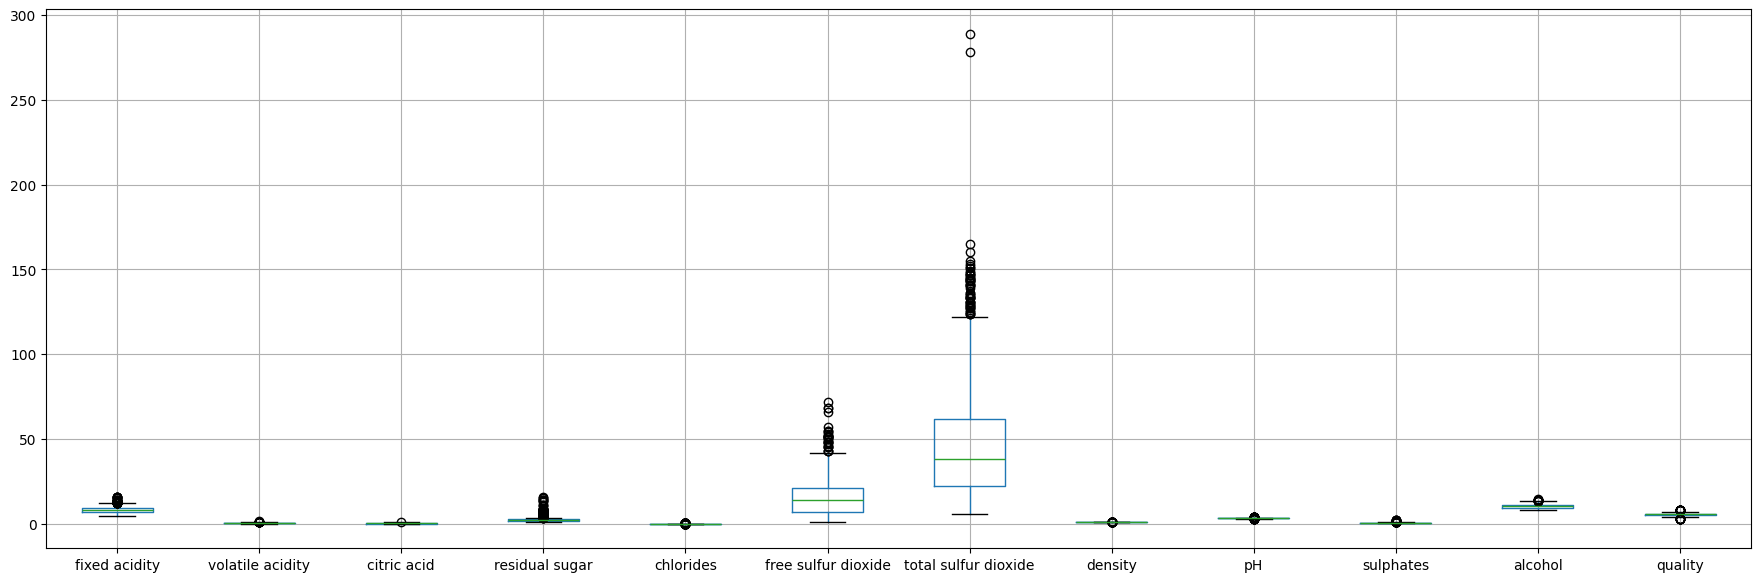

In [3]:
plt.figure(figsize = (22, 7))
df.boxplot()

In [4]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column >= lower_bound) & (column <= upper_bound)]

df = df.apply(remove_outliers)

### Encoding values in "quality" in "quality_binary"

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [6]:
df["quality_binary"] = (df["quality"] >= 7).astype(float)

In [7]:
df.drop("quality", axis=1, inplace=True)

### Dealing with Missing Values

In [8]:
df.shape

(1599, 12)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_binary'],
      dtype='object')

In [10]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality_binary            0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(df)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df["quality_binary"].unique()

array([0., 1.])

### Correlation Matrix

In [12]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

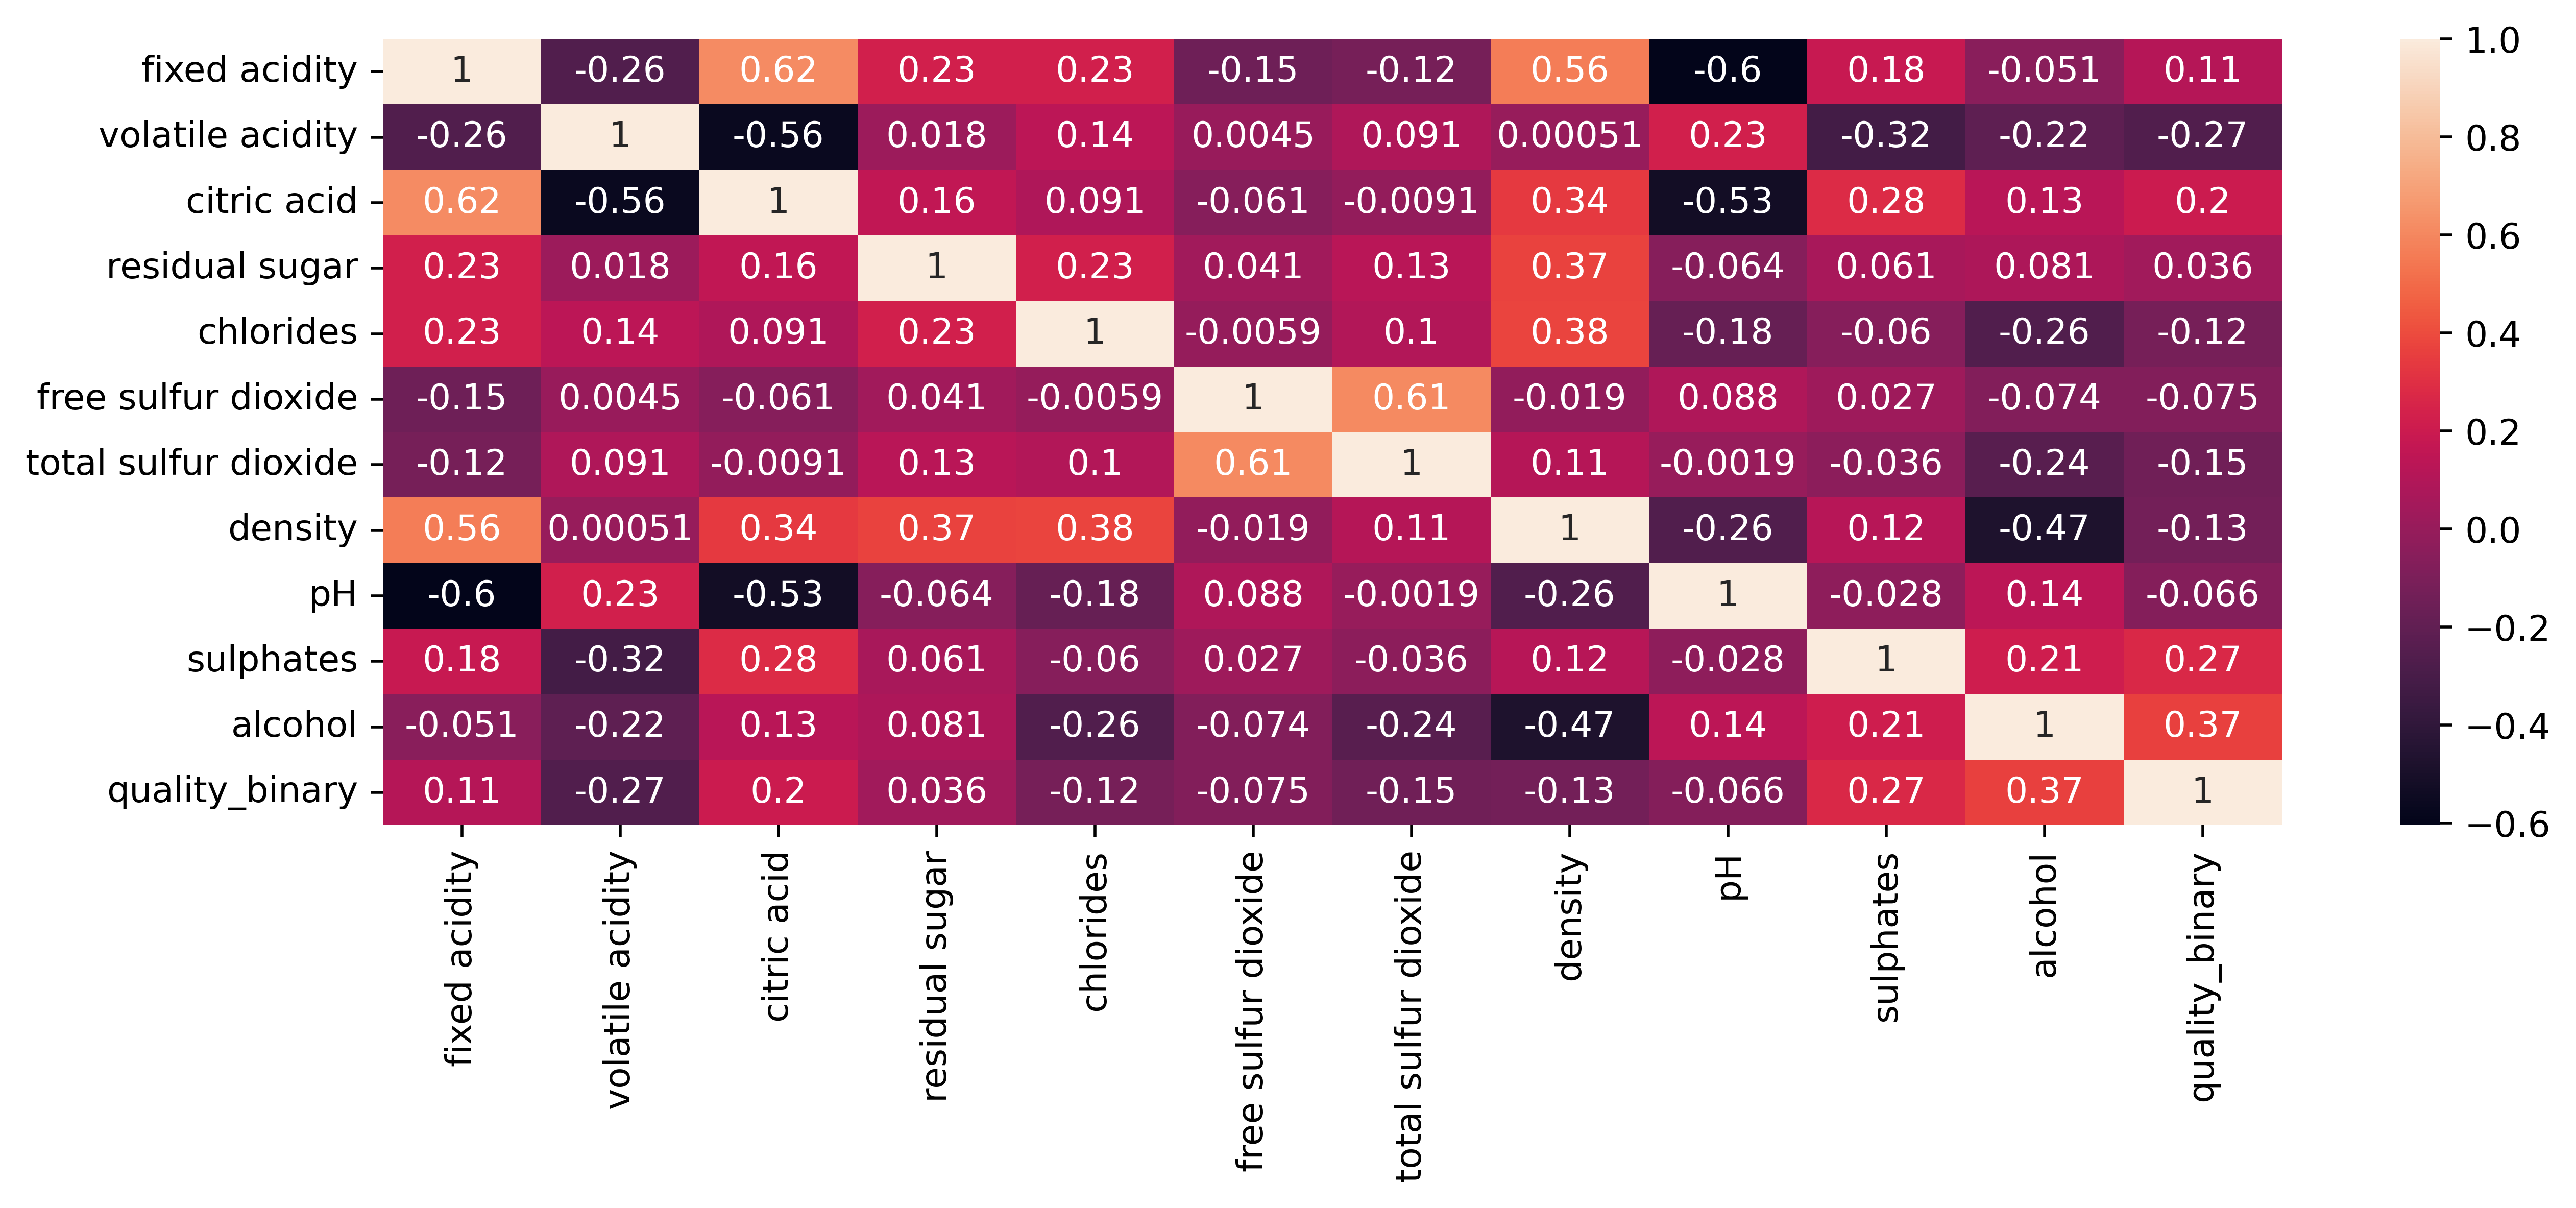

In [13]:
corr = df.corr(method="pearson")
plt.figure(figsize=(12,4), dpi =500)
sns.heatmap(corr, annot=True)
plt.show

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df["quality_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Normalizing Data

In [15]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Random-Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
y_train.unique()

array([0., 1.])

In [18]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [19]:
rf_classification_report = classification_report(y_test, rf_predictions)

In [20]:
print("Random Forest Classifier Classification Report:")
print(rf_classification_report)


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       422
         1.0       0.69      0.34      0.46        58

    accuracy                           0.90       480
   macro avg       0.80      0.66      0.70       480
weighted avg       0.89      0.90      0.89       480



### Decision-Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

In [23]:
dt_predictions = dt_classifier.predict(X_test)

In [24]:
dt_classification_report = classification_report(y_test, dt_predictions)

In [25]:
print("Decision Tree Classifier Classification Report:")
print(dt_classification_report)

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       422
         1.0       0.40      0.47      0.43        58

    accuracy                           0.85       480
   macro avg       0.66      0.69      0.67       480
weighted avg       0.86      0.85      0.86       480

